In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
density = [0.1*x for x in range(10,0,-1)]
deff = pd.DataFrame({"Density":density})
d = deff["Density"]

b_val = 16
b_delta = 4

z = (1-d)**(2**b_delta)

deff["CSR32"] = d*(b_val+32)/b_val
deff["CSR16"] = d*(b_val+16)/b_val
deff["MACKO best"] = d*(b_val+b_delta)/b_val
deff["MACKO expected"] = d*(1+z/(1-z))*(b_val+b_delta)/b_val
deff["MACKO worst"] = (d+(1-d)/(2**b_delta))*(b_val+b_delta)/b_val


In [3]:
print(deff.round(3).to_markdown(index=False))


|   Density |   CSR32 |   CSR16 |   MACKO best |   MACKO expected |   MACKO worst |
|----------:|--------:|--------:|-------------:|-----------------:|--------------:|
|       1   |     3   |     2   |        1.25  |            1.25  |         1.25  |
|       0.9 |     2.7 |     1.8 |        1.125 |            1.125 |         1.133 |
|       0.8 |     2.4 |     1.6 |        1     |            1     |         1.016 |
|       0.7 |     2.1 |     1.4 |        0.875 |            0.875 |         0.898 |
|       0.6 |     1.8 |     1.2 |        0.75  |            0.75  |         0.781 |
|       0.5 |     1.5 |     1   |        0.625 |            0.625 |         0.664 |
|       0.4 |     1.2 |     0.8 |        0.5   |            0.5   |         0.547 |
|       0.3 |     0.9 |     0.6 |        0.375 |            0.376 |         0.43  |
|       0.2 |     0.6 |     0.4 |        0.25  |            0.257 |         0.312 |
|       0.1 |     0.3 |     0.2 |        0.125 |            0.153 |         

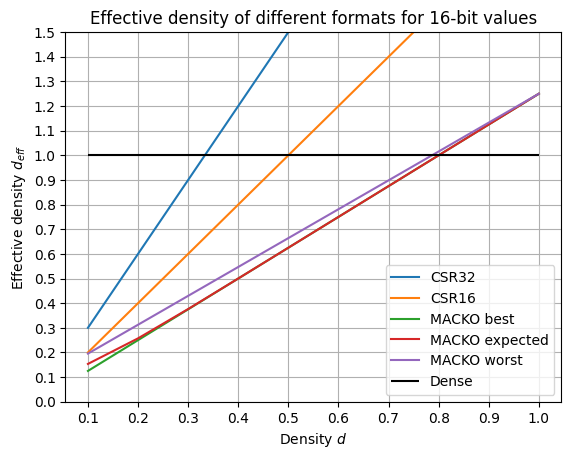

In [4]:
y_ticks = [0.1*x for x in range(16)]

deff.plot(
    x="Density", 
    xticks=deff["Density"], 
    yticks=y_ticks,
    ylabel="Effective density $d_{eff}$",
    ylim=(min(y_ticks),max(y_ticks)),
    title=f"Effective density of different formats for {b_val}-bit values",
    xlabel="Density $d$")

plt.hlines(1, 0.1, 1, color="Black", label="Dense", linestyles="-")
plt.legend()
plt.grid()
plt.savefig(f"../media/{b_val}bit_effective_density.svg")
plt.savefig(f"../media/{b_val}bit_effective_density.png")



In [5]:
import numpy as np

In [6]:
density = [0.01*x for x in range(100,9,-1)]
density_ticks = [0.1*x for x in range(10,0,-1)]
deff = pd.DataFrame({"Density":density})
d = deff["Density"]

b_val = 16
b_delta = 4

z = (1-d)**(2**b_delta)

deff["CSR32"] = d*(b_val+32)/b_val
deff["Tiled-CSL/CSR16"] = d*(b_val+16)/b_val
#deff["MACKO best"] = d*(b_val+b_delta)/b_val
#deff["MACKO worst"] = (d+(1-d)/(2**b_delta))*(b_val+b_delta)/b_val
deff["MACKO"] = d*(1+z/(1-z))*(b_val+b_delta)/b_val
deff["Bitmask"] = d + 1/b_val

In [7]:
deff

,Density,CSR32,Tiled-CSL/CSR16,MACKO,Bitmask
0,1.00,3.00,2.00,1.250000,1.0625
1,0.99,2.97,1.98,1.237500,1.0525
2,0.98,2.94,1.96,1.225000,1.0425
3,0.97,2.91,1.94,1.212500,1.0325
4,0.96,2.88,1.92,1.200000,1.0225
...,...,...,...,...,...
86,0.14,0.42,0.28,0.192209,0.2025
87,0.13,0.39,0.26,0.182118,0.1925
88,0.12,0.36,0.24,0.172283,0.1825
89,0.11,0.33,0.22,0.162716,0.1725


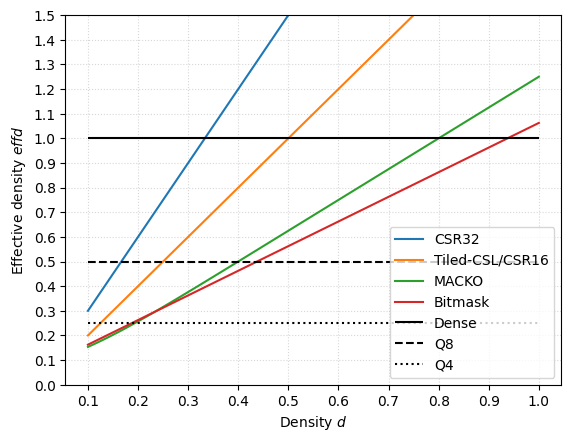

In [8]:
y_ticks = [0.1*x for x in range(16)]

deff.plot(
    x="Density", 
    xticks=density_ticks, 
    yticks=y_ticks,
    ylabel="Effective density $effd$",
    ylim=(min(y_ticks),max(y_ticks)),
    title=f"",
    xlabel="Density $d$")

plt.hlines(1, 0.1, 1, color="Black", label="Dense", linestyles="-")
plt.hlines(0.5, 0.1, 1, color="Black", label="Q8", linestyles="--")
plt.hlines(0.25, 0.1, 1, color="Black", label="Q4", linestyles=":")
plt.legend()
plt.grid(linestyle=":", alpha=0.5)
plt.savefig(f"../../macko_spmv_paper/paper/effective_density.pdf", bbox_inches='tight')



In [9]:
density = [0.01*x for x in range(100,9,-1)]
density_ticks = [0.1*x for x in range(10,0,-1)]
deff = pd.DataFrame({"Density":density})
d = deff["Density"]

b_val = 16
b_delta = 4


deff["Tiled-CSL/CSR16"] = d*(b_val+16)/b_val
deff["MACKO_opt"] = 100.
for delta in [1,2,4,8]: 
    z = (1-d)**(2**delta)
    tmp = d*(1+z/(1-z))*(b_val+delta)/b_val
    deff["MACKO_opt"] = np.where(
        deff["MACKO_opt"] < tmp, 
        deff["MACKO_opt"], 
        tmp)

deff["MACKO_opt_worst"] = 100.
for delta in [1,2,4,8]: 
    tmp = (d+(1-d)/(2**delta))*(b_val+delta)/b_val

    deff["MACKO_opt_worst"] = np.where(
        deff["MACKO_opt_worst"] < tmp, 
        deff["MACKO_opt_worst"], 
        tmp)

deff["Bitmask"] = d + 1/b_val
deff["Enthropy"] = d - (d*np.log2(d)+(1-d)*np.log2(1-d))/b_val
deff["Density2"] = d


/home/vlejd/phd/code/macko_spmv/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [10]:
deff

,Density,Tiled-CSL/CSR16,MACKO_opt,MACKO_opt_worst,Bitmask,Enthropy,Density2
0,1.00,2.00,1.062500,1.062500,1.0625,NaN,1.00
1,0.99,1.98,1.051980,1.057187,1.0525,0.995050,0.99
2,0.98,1.96,1.041667,1.051875,1.0425,0.988840,0.98
3,0.97,1.94,1.031553,1.046563,1.0325,0.982149,0.97
4,0.96,1.92,1.021635,1.041250,1.0225,0.975143,0.96
...,...,...,...,...,...,...,...
86,0.14,0.28,0.192209,0.215039,0.2025,0.176515,0.14
87,0.13,0.26,0.182118,0.200098,0.1925,0.164840,0.13
88,0.12,0.24,0.172283,0.185156,0.1825,0.153085,0.12
89,0.11,0.22,0.162716,0.170215,0.1725,0.141245,0.11


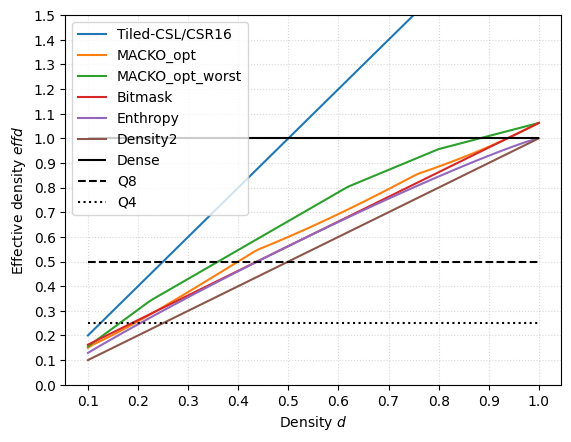

In [11]:
y_ticks = [0.1*x for x in range(16)]

deff.plot(
    x="Density", 
    xticks=density_ticks, 
    yticks=y_ticks,
    ylabel="Effective density $effd$",
    ylim=(min(y_ticks),max(y_ticks)),
    title=f"",
    xlabel="Density $d$")

plt.hlines(1, 0.1, 1, color="Black", label="Dense", linestyles="-")
plt.hlines(0.5, 0.1, 1, color="Black", label="Q8", linestyles="--")
plt.hlines(0.25, 0.1, 1, color="Black", label="Q4", linestyles=":")
plt.legend()
plt.grid(linestyle=":", alpha=0.5)